<a href="https://colab.research.google.com/github/Manpreetkaur3689/Manpreetkaur3689/blob/main/jupyter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libraries imported.
Optimal phases (θ₁, θ₂): [0. 0.]
Minimized divergence cost: 0.0


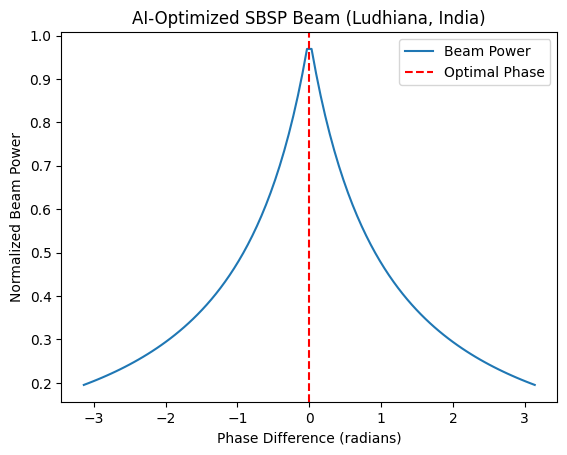

Plot saved as sbsp_quantum_opt_plot.png


In [ ]:

# Classical AI for SBSP Beam Optimization
# Google Colab (May 27, 2025, Python 3.12)
# Optimizes antenna phases (θ₁, θ₂) for UCY PhD, article (Medium, X)

# Step 1: Import libraries (auto-install if needed)
try:
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.optimize import minimize
    print("Libraries imported.")
except:
    !pip install numpy scipy matplotlib --quiet
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.optimize import minimize
    print("Libraries installed and imported.")

# Step 2: Define cost function
def beam_divergence_cost(params):
    theta1, theta2 = params
    spread = abs(theta1 - theta2)
    cost = spread + 0.1 * (theta1**2 + theta2**2)
    return cost

# Step 3: Optimize phases
try:
    initial_guess = [0.0, 0.0]  # Simple starting point
    result = minimize(beam_divergence_cost, initial_guess, method='Nelder-Mead')
    optimal_params = result.x
    optimal_cost = result.fun
    print("Optimal phases (θ₁, θ₂):", optimal_params)
    print("Minimized divergence cost:", optimal_cost)
except Exception as e:
    print(f"Optimization error: {e}")
    raise

# Step 4: Plot results
try:
    theta_diff = np.linspace(-3.14, 3.14, 100)
    power = [1 / (1 + beam_divergence_cost([0, delta])) for delta in theta_diff]
    plt.plot(theta_diff, power, label='Beam Power')
    plt.axvline(optimal_params[0] - optimal_params[1], color='r', linestyle='--', label='Optimal Phase')
    plt.xlabel('Phase Difference (radians)')
    plt.ylabel('Normalized Beam Power')
    plt.title('AI-Optimized SBSP Beam (Ludhiana, India)')
    plt.legend()
    plt.savefig('sbsp_quantum_opt_plot.png')
    plt.show()
    print("Plot saved as sbsp_quantum_opt_plot.png")
except Exception as e:
    print(f"Plotting error: {e}")
    raise